In [5]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df_work_data = pd.read_csv('result/filled_P_l.csv')

In [97]:
df_work_data['initial_data_T_F'] = df_work_data['P_l'].notna()

In [112]:
import pandas as pd
import numpy as np
import random



def poisson_value(date_with_nan, df, time_window_minutes=5):
    # Найти индекс строки с заданной датой
    mask = df['time'] == date_with_nan
    if mask.any():
        index_with_nan = df.index[mask][0]
    else:
        return []  # Вернуть пустой список, если дата не найдена

    mask = ((df['time'].dt.month == date_with_nan.month) &
            (df['time'].dt.day == date_with_nan.day) &
            (df['time'].dt.hour == date_with_nan.hour) &
            (df['time'].dt.minute >= date_with_nan.minute - time_window_minutes) &
            (df['time'].dt.minute <= date_with_nan.minute + time_window_minutes) &
            (~df['P_l'].isna()))

    existing_values = df.loc[mask, 'P_l'].tolist()
    mean_value = np.mean(existing_values)
    count_index = 1000
    s = np.random.poisson(mean_value, count_index).tolist()
    index = random.randint(0, 999)
    poisson_value = s[index]
    return poisson_value



def poisson_value_2(date_with_nan, df, time_window_minutes=5):
    # Создайте маску, чтобы выбрать все строки, которые соответствуют условиям месяца, дня, часа и минуты.
    mask = ((df['time'].dt.month == date_with_nan.month) &
            (df['time'].dt.day == date_with_nan.day) &
            (df['time'].dt.hour == date_with_nan.hour) &
            (df['time'].dt.minute >= date_with_nan.minute - time_window_minutes) &
            (df['time'].dt.minute <= date_with_nan.minute + time_window_minutes))
    print(mask)
    # Отфильтруйте строки, чтобы исключить NaN значения в столбце 'P_l'.
    non_nan_values = df.loc[mask, 'P_l'].dropna()
    matching_indices = non_nan_values.index.tolist()
    # Проверьте, что есть хотя бы одно значение без NaN.
    if non_nan_values.empty:
        return []  # Вернуть пустой список, если нет подходящих значений.

    # Вычислите среднее значение для отфильтрованных значений.
    mean_value = non_nan_values.mean()

    # Генерируйте случайные значения Пуассона на основе среднего значения.
    count_index = 100
    s = np.random.poisson(mean_value, count_index).tolist()
    index = random.randint(0, 99)
    poisson_value = s[index]
    return poisson_value, matching_indices



def normal_value(date_with_nan, dataframe, time_window_minutes=50):
    # Найти индекс строки с заданной датой
    mask = df['time'] == date_with_nan
    if mask.any():
        index_with_nan = dataframe.index[mask][0]
    else:
        return []  # Вернуть пустой список, если дата не найдена

    # Найти диапазон времени для поиска существующих значений
    time_range = pd.to_timedelta(time_window_minutes, unit='m')
    start_time = dataframe.loc[index_with_nan, 'time'] - time_range
    end_time = dataframe.loc[index_with_nan, 'time'] + time_range

    # Найти существующие значения в заданном диапазоне времени
    mask = (dataframe['time'] >= start_time) & (dataframe['time'] <= end_time) & (~dataframe['P_l'].isna())
    existing_values = dataframe.loc[mask, 'P_l'].tolist()

    # Рассчитать стандартное отклонение на основе существующих значений
    std_deviation = np.std(existing_values)

    # Генерировать случайное значение с нормальным распределением
    mean_value = np.mean(existing_values)
    random_value = np.random.normal(mean_value, std_deviation)

    return random_value



In [99]:
df_poisson, df_normal = df_work_data, df_work_data


In [100]:
df_poisson['time'] = pd.to_datetime(df_poisson['time'])


In [101]:
df_poisson['P_l_poisson'] = np.nan

In [110]:
from datetime import datetime

# Your date and time string, including timezone information
date_with_timezone = '2023-09-11 15:10:00+00:00'

# Define the format of the string so that datetime can correctly parse the date and time.
# The format should include timezone information (UTC offset),
# which is expressed as '+00:00' at the end of the string.
format_string = '%Y-%m-%d %H:%M:%S%z'

# Now, parse the string into a datetime object
dt = datetime.strptime(date_with_timezone, format_string)

# The dt object now contains the date and time in datetime format,
# including timezone information
print(dt)


2023-09-11 15:10:00+00:00


In [116]:
date_with_nan = dt

poisson_value, matching_indices = poisson_value_2(date_with_nan, df_poisson, time_window_minutes=5)

print(df_poisson.iloc[matching_indices])
print(df_poisson)

0         False
1         False
2         False
3         False
4         False
          ...  
762888    False
762889    False
762890    False
762891     True
762892     True
Name: time, Length: 762893, dtype: bool
                            time         P_l  initial_data_T_F  P_l_poisson
26763  2016-09-11 15:05:00+00:00  21682.6700              True          NaN
26764  2016-09-11 15:10:00+00:00  20857.0400              True          NaN
26765  2016-09-11 15:15:00+00:00  19939.9600              True          NaN
131883 2017-09-11 15:05:00+00:00  20421.4100              True          NaN
131884 2017-09-11 15:10:00+00:00  21514.7000              True          NaN
131885 2017-09-11 15:15:00+00:00  20875.8600              True          NaN
237003 2018-09-11 15:05:00+00:00  22556.8326              True          NaN
237004 2018-09-11 15:10:00+00:00  24631.6210              True          NaN
237005 2018-09-11 15:15:00+00:00  24286.0020              True          NaN
342123 2019-09-11 15:05:

In [117]:
file_path = 'result/poisson.csv'

df_poisson.to_csv(file_path, index=False)

In [102]:
from tqdm import tqdm

for index, row in tqdm(df_poisson.iterrows(), total=len(df_poisson)):
    if pd.isna(row['P_l']):
        date_with_nan = row['time']
        random_poisson_value = poisson_value_2(date_with_nan, df_poisson)
        df_poisson.at[index, 'P_l_poisson'] = random_poisson_value
    else:
        df_poisson.at[index, 'P_l_poisson'] = np.nan


100%|█████████████████████████████████| 762893/762893 [2:07:11<00:00, 99.97it/s]


In [103]:
print(df_poisson)

                            time        P_l  initial_data_T_F  P_l_poisson
0      2016-06-10 16:50:00+00:00  26441.630              True          NaN
1      2016-06-10 16:55:00+00:00  26039.196              True          NaN
2      2016-06-10 17:00:00+00:00  21790.632              True          NaN
3      2016-06-10 17:05:00+00:00  22824.290              True          NaN
4      2016-06-10 17:10:00+00:00  23408.187              True          NaN
...                          ...        ...               ...          ...
762888 2023-09-11 14:50:00+00:00  31766.700              True          NaN
762889 2023-09-11 14:55:00+00:00  31646.600              True          NaN
762890 2023-09-11 15:00:00+00:00  30781.170              True          NaN
762891 2023-09-11 15:05:00+00:00        NaN             False      23222.0
762892 2023-09-11 15:10:00+00:00        NaN             False      22492.0

[762893 rows x 4 columns]


In [6]:
df_poisson = pd.read_csv('result/poisson.csv')

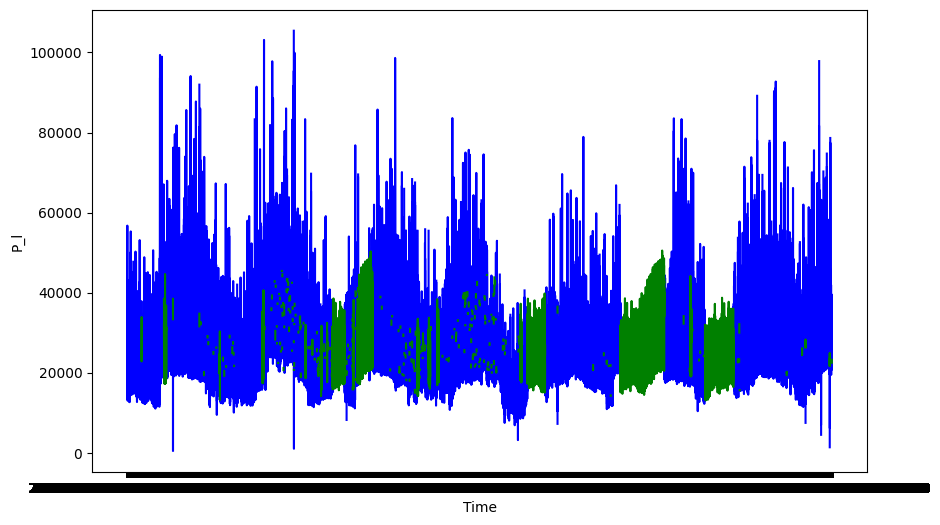

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.plot(df_poisson['time'], df_poisson['P_l'],  color='blue')
plt.plot(df_poisson['time'], df_poisson['P_l_poisson'], color='green')

# Настройте оси и добавьте легенду
plt.xlabel('Time')
plt.ylabel('P_l')


# Отобразите график
plt.show()